# <font color=green size=10>CURSO DE ESTATÍSTICA - PARTE 3</font>

***

## Trabalho sobre testes de hipóteses

Utilizando os conhecimentos adquiridos em nosso treinamento realize o teste de hipóteses proposto abaixo.

Siga o roteiro proposto e vá completando as células vazias. Procure pensar em mais testes interessantes que podem ser realizados com o nosso dataset.

# <font color=green>DATASET DO PROJETO</font>
***

### Pesquisa Nacional por Amostra de Domicílios - 2015

A <b>Pesquisa Nacional por Amostra de Domicílios - PNAD</b> investiga anualmente, de forma permanente, características gerais da população, de educação, trabalho, rendimento e habitação e outras, com periodicidade variável, de acordo com as necessidades de informação para o país, como as características sobre migração, fecundidade, nupcialidade, saúde, segurança alimentar, entre outros temas. O levantamento dessas estatísticas constitui, ao longo dos 49 anos de realização da pesquisa, um importante instrumento para formulação, validação e avaliação de políticas orientadas para o desenvolvimento socioeconômico e a melhoria das condições de vida no Brasil.

### Fonte dos Dados

https://ww2.ibge.gov.br/home/estatistica/populacao/trabalhoerendimento/pnad2015/microdados.shtm

### Variáveis utilizadas

> ### Renda
> ***

Rendimento mensal do trabalho principal para pessoas de 10 anos ou mais de idade.

> ### Idade
> ***

Idade do morador na data de referência em anos.

> ### Altura (elaboração própria)
> ***

Altura do morador em metros.

> ### UF
> ***

|Código|Descrição|
|---|---|
|11|Rondônia|
|12|Acre|
|13|Amazonas|
|14|Roraima|
|15|Pará|
|16|Amapá|
|17|Tocantins|
|21|Maranhão|
|22|Piauí|
|23|Ceará|
|24|Rio Grande do Norte|
|25|Paraíba|
|26|Pernambuco|
|27|Alagoas|
|28|Sergipe|
|29|Bahia|
|31|Minas Gerais|
|32|Espírito Santo|
|33|Rio de Janeiro|
|35|São Paulo|
|41|Paraná|
|42|Santa Catarina|
|43|Rio Grande do Sul|
|50|Mato Grosso do Sul|
|51|Mato Grosso|
|52|Goiás|
|53|Distrito Federal|

> ### Sexo
> ***

|Código|Descrição|
|---|---|
|0|Masculino|
|1|Feminino|

> ### Anos de Estudo
> ***

|Código|Descrição|
|---|---|
|1|Sem instrução e menos de 1 ano|
|2|1 ano|
|3|2 anos|
|4|3 anos|
|5|4 anos|
|6|5 anos|
|7|6 anos|
|8|7 anos|
|9|8 anos|
|10|9 anos|
|11|10 anos|
|12|11 anos|
|13|12 anos|
|14|13 anos|
|15|14 anos|
|16|15 anos ou mais|
|17|Não determinados|
||Não aplicável|

> ### Cor
> ***

|Código|Descrição|
|---|---|
|0|Indígena|
|2|Branca|
|4|Preta|
|6|Amarela|
|8|Parda|
|9|Sem declaração|

#### <font color='red'>Observação</font>
***
> Os seguintes tratamentos foram realizados nos dados originais:
> 1. Foram eliminados os registros onde a <b>Renda</b> era inválida (999 999 999 999);
> 2. Foram eliminados os registros onde a <b>Renda</b> era missing;
> 3. Foram considerados somente os registros das <b>Pessoas de Referência</b> de cada domicílio (responsável pelo domicílio).

***
***

### Utilize a célula abaixo para importar as biblioteca que precisar para executar as tarefas
#### <font color='red'>Sugestões: pandas, numpy, scipy, statsmodels</font>

In [59]:
import pandas as pd
import numpy as np
import scipy.stats as ss

from statsmodels.stats.weightstats import DescrStatsW, CompareMeans
from statsmodels.stats.weightstats import ztest

import seaborn as sns
import matplotlib.pyplot as plt

### Importe o dataset e armazene o conteúdo em uma DataFrame

In [3]:
dados = pd.read_csv('dados.csv')

In [5]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76840 entries, 0 to 76839
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   UF              76840 non-null  int64  
 1   Sexo            76840 non-null  int64  
 2   Idade           76840 non-null  int64  
 3   Cor             76840 non-null  int64  
 4   Anos de Estudo  76840 non-null  int64  
 5   Renda           76840 non-null  int64  
 6   Altura          76840 non-null  float64
dtypes: float64(1), int64(6)
memory usage: 4.1 MB


In [7]:
dados[['Idade', 'Anos de Estudo', 'Renda', 'Altura']].describe()

,Idade,Anos de Estudo,Renda,Altura
count,76840.000000,76840.000000,76840.000000,76840.000000
mean,44.071421,9.469664,2000.383199,1.699512
std,12.480583,4.539929,3323.387730,0.079717
min,13.000000,1.000000,0.000000,1.339245
25%,34.000000,6.000000,788.000000,1.645785
50%,43.000000,11.000000,1200.000000,1.699325
75%,53.000000,12.000000,2000.000000,1.753062
max,99.000000,17.000000,200000.000000,2.028497


In [8]:
dados.query('Renda == 0').count()

,0
UF,2867
Sexo,2867
Idade,2867
Cor,2867
Anos de Estudo,2867
Renda,2867
Altura,2867


### Visualize o conteúdo do DataFrame

In [4]:
dados.head()

,UF,Sexo,Idade,Cor,Anos de Estudo,Renda,Altura
0,11,0,23,8,12,800,1.603808
1,11,1,23,2,12,1150,1.739790
2,11,1,35,8,15,880,1.760444
3,11,0,46,2,6,3500,1.783158
4,11,1,47,8,9,150,1.690631


## <font color='red'>Problema</font>

Você é um pesquisador que estuda o mercado de trabalho brasileiro e resolve estudar as diferenças salariais dos trabalhadores dos estados do Rio de Janeiro e de São Paulo. Durante sua pesquisa você verifica que, aparentemente, os rendimentos dos trabalhadores no estado do Rio de Janeiro são mais baixos que os rendimentos dos trabalhadores no estado de São Paulo. Para confirmar esta conclusão realize um teste de hipótese de comparação de médias em cima de duas amostras de trabalhadores dos dois estados. Siga as seguintes etapas:

- Selecione duas amostras de **500 trabalhadores** para cada um dos dois estados (variável UF) para realizar o teste. Utilize o **parâmetro random_state=101**.
- Considere o **nível de significância de 5%**.
- Teste a hipótese de que a **renda média dos trabalhadores do Rio de Janeiro é menor que a renda média dos trabalhadores de São Paulo**.

In [9]:
media_rj = dados.query('UF == 33').Renda.mean()
media_sp = dados.query('UF == 35').Renda.mean()

print(media_rj)
print(media_sp)

2496.4031677465805
2638.1049859550562


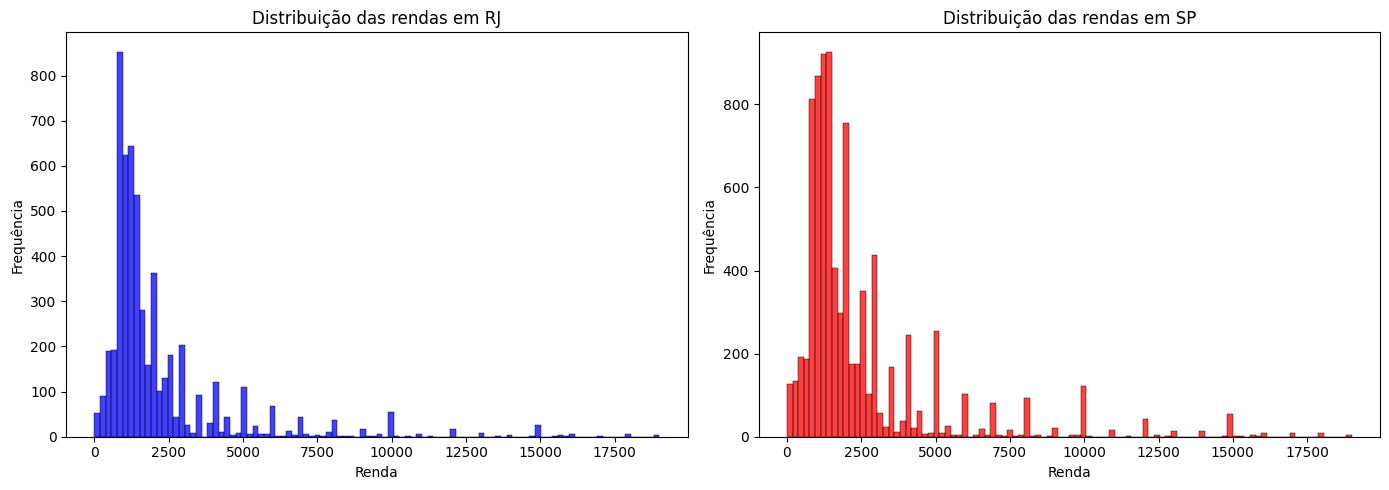

In [53]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

sns.histplot(dados.query('UF == 33 & Renda < 20000').Renda, bins=100, color='blue', stat = 'count', label = 'RJ', ax = ax1)
ax1.set_xlabel('Renda')
ax1.set_ylabel('Frequência')
ax1.set_title('Distribuição das rendas em RJ')

sns.histplot(dados.query('UF == 35 & Renda < 20000').Renda, bins=100, color='red', stat = 'count', label = 'SP', ax = ax2)
ax2.set_xlabel('Renda')
ax2.set_ylabel('Frequência')
ax2.set_title('Distribuição das rendas em SP')

plt.tight_layout()
plt.show()

---

### Seleção das amostras

In [27]:
rj = pd.DataFrame(dados.query('UF == 33').sample(n = 500, random_state = 101).Renda)
sp = pd.DataFrame(dados.query('UF == 35').sample(n = 500, random_state = 101).Renda)

### Dados do problema
Obter média e desvio-padrão para as duas amostras

In [20]:
media_rj, media_sp = rj.mean(), sp.mean()
desvio_rj, desvio_sp = rj.std(), sp.std()

## Lembre-se...

<img src='https://caelum-online-public.s3.amazonaws.com/1229-estatistica-parte3/01/img014.png' width=90%>

---

### **Passo 1** - formulação das hipóteses $H_0$ e $H_1$

#### <font color='red'>Lembre-se, a hipótese nula sempre contém a alegação de igualdade</font>

### $\mu_1 \Rightarrow$ Média das rendas dos chefes de domicílios do RJ
### $\mu_2 \Rightarrow$ Média das rendas dos chefes de domicílios dE SP

### $
\begin{cases}
H_0: \mu_1 =\mu_2\\
H_1: \mu_1 < \mu_2
\end{cases}
$

---

### **Passo 2** - escolha da distribuição amostral adequada

### O tamanho da amostra é maior que 30?
#### Resp.: Sim

### Podemos afirmar que a população se distribui aproximadamente como uma normal?
#### Resp.: Não

### O desvio padrão populacional é conhecido?
#### Resp.: Não

---

### **Passo 3** - fixação da significância do teste ($\alpha$)

In [21]:
significancia = 0.05

In [22]:
confianca = 1 - significancia

---

### **Passo 4** - cálculo da estatística-teste e verificação desse valor com as áreas de aceitação e rejeição do teste

In [46]:
z_alpha = ss.norm.ppf(significancia)
z_alpha

np.float64(-1.6448536269514729)

# ✅ **Você pode fazer um Z-test para 2 amostras, mas só se...**

- As duas amostras são grandes (regra prática: $n \geq 30$)
- As populações têm **desvios padrões conhecidos** (ou você aceita uma boa aproximação com os desvios das amostras)
- As amostras são **independentes**
- As distribuições são aproximadamente **normais** ou o **Teorema Central do Limite** é aplicável

---

⚖️ **Diferença prática entre z-test e t-test:**

| Característica | Z-test | T-test (`ttest_ind`) |
|----------------|--------|-----------------------|
| $\sigma$ (desvio padrão populacional) conhecido? | ✅ Sim (ou grandes amostras) | ❌ Não precisa |
| Amostras pequenas ($n < 30$)? | ❌ Não recomendado | ✅ Funciona bem |
| Uso comum? | Raro em prática | Muito comum |


# Usando T-Test

In [65]:
t, p_value = ss.ttest_ind (rj.Renda, sp.Renda, alternative = 'less')
print('t = {}'.format(t.round(2)))
print('p_value = {}'.format(p_value.round(2)))

t = -2.26
p_value = 0.01


# Usando Z-Test

In [66]:
from statsmodels.stats.weightstats import ztest

z, p = ztest(rj.Renda, sp.Renda, alternative='smaller')
print('z = {}'.format(z.round(2)))
print('p_value = {}'.format(p.round(2)))

z = -2.26
p_value = 0.01


---

### **Passo 5** - Aceitação ou rejeição da hipótese nula

### <font color='red'>Critério do valor crítico</font>

In [67]:
if z <= z_alpha:
    print('Rejeitar H0')
else:
    print('Aceitar H0')

Rejeitar H0


### <font color='red'>Critério do valor $p$</font>

### Utilize DescrStatsW

In [68]:
teste_sp = DescrStatsW(sp.Renda)
teste_rj = DescrStatsW(rj.Renda)

In [69]:
test_A = teste_rj.get_compare(teste_sp)

In [70]:
z, p_value = test_A.ztest_ind(alternative='smaller', value=0)
print('z = {}'.format(z.round(2)))
print('p_value = {}'.format(p_value.round(2)))

z = -2.26
p_value = 0.01


### Utilize CompareMeans

In [71]:
test_B = CompareMeans(teste_rj, teste_sp)

In [72]:
z, p_value = test_B.ztest_ind(alternative='smaller', value=0)
print('z = {}'.format(z.round(2)))
print('p_value = {}'.format(p_value.round(2)))

z = -2.26
p_value = 0.01


### <font color='green'>Conclusão: (Digite sua conclusão aqui)</font>